# Example: comparing temperature in three regions

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import pingouin as pg

import PyCO2SYS as pyco2

Load the data. Note: you may need to change the path to the data already downloaded last week.

In [6]:
filename07 = 'data/wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

Use the PyCO2SYS package to calculate seawater carbon chemistry parameters.

https://pyco2sys.readthedocs.io/en/latest/

In [7]:
c07 = pyco2.sys(df07['ALKALI'], df07['TCARBN'], 1, 2,
               salinity=df07['CTDSAL'], temperature=df07['CTDTMP'], 
                pressure=df07['CTDPRS'])

df07['OmegaA'] = c07['saturation_aragonite']

Create a subset of good data in the upper 10m (near surface).

In [9]:
iisurf07 = ((df07['CTDPRS'] <= 10) &
      (df07['NITRAT_FLAG_W'] == 2) & (df07['PHSPHT_FLAG_W'] == 2)
      & (df07['CTDOXY_FLAG_W'] == 2) & (df07['CTDSAL_FLAG_W'] == 2) 
        & (df07['ALKALI_FLAG_W'] == 2) & (df07['TCARBN_FLAG_W'] == 2))

df07surf = df07[iisurf07]

#### Comparing three sample means 

In this example, we are interested in comparing the observed surface temperature in three regions of the California Current System.

##### Create a categorical variable for the region

We will divide the data into three categories: north if the Columbia River, between the Columbia River and Golden Gate, and south of the Golden Gate.

In [10]:
# create a new variable called "region" with no values
df07surf = df07surf.assign(region = [None]*len(df07surf))
df07surf['region']

22      None
46      None
71      None
95      None
151     None
        ... 
2275    None
2287    None
2310    None
2334    None
2335    None
Name: region, Length: 138, dtype: object

In [11]:
# assign string values to region based on latitude
northern = (df07surf['LATITUDE'] > 46.2)
central = (df07surf['LATITUDE'] <= 46.2) & (df07surf['LATITUDE'] >= 37.8)
southern = (df07surf['LATITUDE'] < 37.8) 

df07surf.loc[northern,'region'] = 'north'
df07surf.loc[central,'region'] = 'central'
df07surf.loc[southern,'region'] = 'south'
df07surf['region']

22      north
46      north
71      north
95      north
151     north
        ...  
2275    south
2287    south
2310    south
2334    south
2335    south
Name: region, Length: 138, dtype: object

##### Box plot

Text(0.5, 0, 'region')

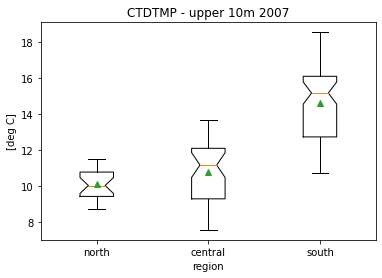

In [12]:
plt.figure()
plt.boxplot([df07surf['CTDTMP'][df07surf['region']=='north'],
             df07surf['CTDTMP'][df07surf['region']=='central'],
             df07surf['CTDTMP'][df07surf['region']=='south']],
            labels=['north','central','south'],showmeans=True,notch=True);
plt.title('CTDTMP - upper 10m 2007')
plt.ylabel('[deg C]')
plt.xlabel('region')

#### Analysis

1. What test (or tests) would you use to determine whether there is a statistically significant difference in surface temperature between these regions?
2. What possible alternative tests did you rule out?
3. What is the null hypothesis being tested?
4. What are the underlying assumptions?
5. Try to implement the analysis with pingouin. For reference, see the [pingouin documentation](https://pingouin-stats.org/api.html).